In [2]:
import keras
import time
import numpy as np
from PIL import Image
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras_vggface.vggface import VGGFace
from keras.models import Model, Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout

In [3]:
K.set_learning_phase(1)
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)
sess = tf.Session()

X = tf.placeholder(dtype = tf.float32, shape = (1, None, None, 3))
Y = tf.placeholder(dtype = tf.float32, shape = (None, 5))

In [4]:
vgg = VGGFace(include_top=False, input_tensor = X)
for layer in vgg.layers:
    layer.trainable = False

In [5]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, None, None, 64)    1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, None, None, 64)    36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, None, None, 64)    0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, None, None, 128)   73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, None, None, 128)   147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, None, None, 128)   0         
__________

In [9]:
p1 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(vgg.get_layer(index=13).output)
p1 = BatchNormalization()(p1)
p2 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(vgg.get_layer(index=17).output)
p2 = BatchNormalization()(p2)
p3 = Conv2D(filters=512, kernel_size=5, strides=1, padding='same')(MaxPool2D(strides=2)(p2))
p3 = BatchNormalization()(p3)
p4 = Conv2D(filters=512, kernel_size=5, strides=1, padding='same')(MaxPool2D(strides=2)(p3))
p4 = BatchNormalization()(p4)


p101 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p102 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p201 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p202 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p301 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p3))
p302 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p3)
p401 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p4))
p402 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p4)


# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)
p3 = MaxPool2D(strides= 2)(p3)
p4 = MaxPool2D(strides= 2)(p4)


p1 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p2 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p3 = Conv2D(filters=512, kernel_size=5, strides=1, padding='same')(p3)
p3 = BatchNormalization()(p3)
p4 = Conv2D(filters=512, kernel_size=5, strides=1, padding='same')(p3)
p4 = BatchNormalization()(p4)

p111 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p112 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p211 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p212 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p311 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p3))
p312 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p3)
p411 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p4))
p412 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p4)

# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)
p3 = MaxPool2D(strides= 2)(p3)
p4 = MaxPool2D(strides= 2)(p4)


p1 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p2 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p3 = Conv2D(filters=256, kernel_size=5, strides=1, padding='same')(p3)
p3 = BatchNormalization()(p3)
p4 = Conv2D(filters=256, kernel_size=5, strides=1, padding='same')(p4)
p4 = BatchNormalization()(p4)

p121 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p122 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p221 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p222 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p321 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p3))
p322 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p3)
p421 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p4))
p422 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p4)

# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)
p3 = MaxPool2D(strides= 2)(p3)
p4 = MaxPool2D(strides= 2)(p4)

p1 = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p2 = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p3 = Conv2D(filters=128, kernel_size=5, strides=1, padding='same')(p3)
p3 = BatchNormalization()(p3)
p4 = Conv2D(filters=128, kernel_size=5, strides=1, padding='same')(p4)
p4 = BatchNormalization()(p4)

p131 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p132 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p231 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p232 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p331 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p3))
p332 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p3)
p431 = K.sigmoid(Conv2D(filters=1, kernel_size=5, strides=1, padding='same')(p4))
p432 = Conv2D(filters=4, kernel_size=5, strides=1, padding='same')(p4)


p102 = K.concatenate(tensors=[p101, p102], axis = -1)
p202 = K.concatenate(tensors=[p201, p202], axis = -1)
p302 = K.concatenate(tensors=[p301, p302], axis = -1)
p402 = K.concatenate(tensors=[p401, p402], axis = -1)

p112 = K.concatenate(tensors=[p111, p112], axis = -1)
p212 = K.concatenate(tensors=[p211, p212], axis = -1)
p312 = K.concatenate(tensors=[p311, p312], axis = -1)
p412 = K.concatenate(tensors=[p411, p412], axis = -1)

p122 = K.concatenate(tensors=[p121, p122], axis = -1)
p222 = K.concatenate(tensors=[p221, p222], axis = -1)
p322 = K.concatenate(tensors=[p321, p322], axis = -1)
p422 = K.concatenate(tensors=[p421, p422], axis = -1)

p132 = K.concatenate(tensors=[p131, p132], axis = -1)
p232 = K.concatenate(tensors=[p231, p232], axis = -1)
p332 = K.concatenate(tensors=[p331, p332], axis = -1)
p432 = K.concatenate(tensors=[p431, p432], axis = -1)

In [10]:
pred = [K.reshape(p102, (-1, 5)),
        K.reshape(p202, (-1, 5)),
        K.reshape(p302, (-1, 5)),
        K.reshape(p402, (-1, 5)),
        K.reshape(p112, (-1, 5)),
        K.reshape(p212, (-1, 5)),
        K.reshape(p312, (-1, 5)),
        K.reshape(p412, (-1, 5)),
        K.reshape(p122, (-1, 5)),
        K.reshape(p222, (-1, 5)),
        K.reshape(p322, (-1, 5)),
        K.reshape(p422, (-1, 5)),
        K.reshape(p132, (-1, 5)),
        K.reshape(p232, (-1, 5)),
        K.reshape(p332, (-1, 5)),
        K.reshape(p432, (-1, 5)),
       ]

In [11]:
pred = K.concatenate(pred, axis = 0)

In [9]:
def NMS(boxes = pred):    
    Z0 = K.tf.image.non_max_suppression(boxes=K.reshape(boxes[:, 1:], (-1, 4)), scores=K.reshape(boxes[:, 0], (-1, )),
                                        max_output_size=25, iou_threshold=0.55)
    A = K.reshape(K.tf.gather_nd(boxes, K.reshape(Z0, (-1, 1))), (-1, 5))
    return A

In [10]:
def sigmoid(X):
    return 1/(1 + K.exp(-X))

def relu(X):
    return K.maximum(X, 0)

def loss(Y, y, a=0.8):
    if K.tf.size(Y) != K.tf.size(y):
        n = K.tf.truncatediv(K.tf.size(Y),  K.constant(value = 5, dtype=K.tf.int32))
        y_ = y[:n]
        
    softMax = K.mean(-(Y[:, 0] * K.log(y_[:, 0]) + (1 - Y[:, 0]) * K.log(1 - y_[:, 0])))
    mse = K.mean(K.square(Y[:, 1:] - y_[:, 1:]))
    return 2.5 * softMax + 1.8 * mse + 2 * K.mean(y[n:])

In [11]:
bbox = NMS()

In [12]:
Loss = loss(Y, bbox)

In [13]:
opt = K.tf.train.AdamOptimizer(learning_rate=0.000003)
train_ = opt.minimize(Loss)

In [14]:
sess.run(K.tf.global_variables_initializer())

ResourceExhaustedError: OOM when allocating tensor of shape [5,5,512,512] and type float
	 [[Node: conv2d_3/kernel/Adam/Initializer/zeros = Const[_class=["loc:@conv2d_3/kernel"], dtype=DT_FLOAT, value=Tensor<type: float shape: [5,5,512,512] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'conv2d_3/kernel/Adam/Initializer/zeros', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/chawat/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/chawat/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/chawat/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/chawat/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/chawat/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/chawat/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/chawat/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/chawat/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/chawat/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/chawat/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/chawat/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/chawat/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-fa5f99f60105>", line 2, in <module>
    train_ = opt.minimize(Loss)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 353, in minimize
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 474, in apply_gradients
    self._create_slots([_get_variable_for(v) for v in var_list])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/adam.py", line 136, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 796, in _zeros_slot
    named_slots[_var_key(var)] = slot_creator.create_zeros_slot(var, op_name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/slot_creator.py", line 174, in create_zeros_slot
    colocate_with_primary=colocate_with_primary)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/slot_creator.py", line 148, in create_slot_with_initializer
    dtype)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/slot_creator.py", line 67, in _create_slot_var
    validate_shape=validate_shape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 1203, in get_variable
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 1092, in get_variable
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 425, in get_variable
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 394, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 805, in _get_single_variable
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 303, in _init_from_args
    initial_value(), name="initial_value", dtype=dtype)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 779, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py", line 93, in __call__
    return array_ops.zeros(shape, dtype)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1439, in zeros
    output = constant(zero, shape=shape, dtype=dtype, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/constant_op.py", line 214, in constant
    name=name).outputs[0]
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [5,5,512,512] and type float
	 [[Node: conv2d_3/kernel/Adam/Initializer/zeros = Const[_class=["loc:@conv2d_3/kernel"], dtype=DT_FLOAT, value=Tensor<type: float shape: [5,5,512,512] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [ ]:
def train(epochs = 10):
    for e in range(epochs):
        cost = 0
        _, L = sess.run([train_, Loss], feed_dict={X: np.expand_dims(np.array(Image.open("x.jpg"))/255, axis=0), Y: np.array([1, 170/500, 40/375, 175/375, 120/500]).reshape((-1, 5))})      
        cost += L
        if e % 10 == 0:
            print("epoch {}, iter {} , loss {}".format(e, 0 , cost))

In [69]:
train(epochs = 20)

epoch 0, iter 0 , loss 0.006460011471062899
epoch 10, iter 0 , loss 0.0022133132442831993


In [70]:
d = sess.run(bbox, feed_dict={X: np.expand_dims(np.array(Image.open("x.jpg"))/255, axis=0)})

In [71]:
d[0]

array([0.9999572 , 0.32965505, 0.12375323, 0.47105104, 0.2516602 ],
      dtype=float32)

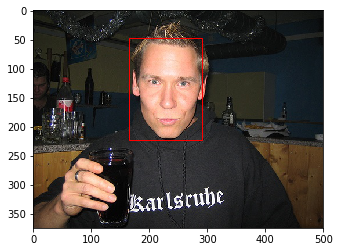

In [74]:
plot_box(d[0])

In [72]:
def plot_box(box):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image
    
    p, x, y, h, w = box
    im = np.array(Image.open('x.jpg'), dtype=np.uint8)

    fig,ax = plt.subplots(1)

    ax.imshow(im)

    rect = patches.Rectangle((x*500,y*375),w*500,h*375,linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

    plt.show()

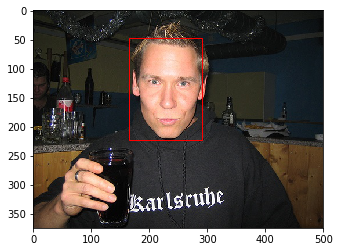